# <font color = Blue> Aim: To Predict Monthly House Rent in Mumbai City with given Data. </font>

## <font color = Blue> Approch: </font>
- Import Dataset and have a very Quick look.
- Analyze and Clean Data. Look into each and every feature and make them clean for use.
- Remove Outliers and exception data by visualizing features.
- Visualize and have a look how features related with monthly rent.
- Prepare and Scale Data for Machine learning model.
- Try Different ML models and calculate their accuracy scores.
- Select best model.


<a id = 'top'></a>
## <font color = Blue> Table of Contents: </font>
- <a href = '#s1'> 1. Importing Data and required packages. </a>
- <a href = '#s2'> 2. Data Analyzing and Wranggling. </a>
- <a href = '#s3'> 3. Data Visualization and Removing Outliers/Exceptions. </a>
- <a href = '#s4'> 4. OneHotEncoding Text features.  </a>
- <a href = '#s5'> 5. Machine Learning Model Building. </a>

## <a href = '#s6'> <font color = Red> Conclusion </font> </a>

<a id = 's1'></a>
# <font color = Blue> 1. Importing Data and required packages. </font>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings                                             # only to ignore python warnings
%matplotlib inline
warnings.simplefilter("ignore")

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/Mumbai_house_rent_99acers/Mumbai_99acers.csv')
data.head(3)

,sl no.,society,type,location,lattitude,longitude,bedrooms,built-up area,furnishing,age,floor,total floors,dealer,posted,monthly rent,property photo,property video,society photo,society video,locality photo,locality video,description
0,1,Bandstand Apartment,Residential Apartment,Bandra (West),19.047353,72.820068,2 BHK,800.0,Furnished,5 to 10 years old,2nd,6,PROPBAY,Jul-05-2018,85000,2,0,3,0,0,0,Description : 2 bhk apartment for rent in band...
1,2,Fantastic Apartment,Residential Apartment,Khar West,19.071690,72.834127,2 BHK,1050.0,Furnished,1 to 5 years old,8th,12,PROPBAY,Jul-05-2018,110000,0,0,0,0,1,0,Description : 2 bhk apartment for rent in khar...
2,3,Gajra Bhoomi Symphony,Residential Apartment,Sector-20 Koparkhairane,19.109368,73.001346,2 BHK,1050.0,Unfurnished,1 to 5 years old,14th,17,AAKASH REAL ESTATE,Jul-07-2018,32000,0,0,0,1,0,0,Description : 2 bhk flat available for rent in...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13541 entries, 0 to 13540
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl no.          13541 non-null  int64  
 1   society         13541 non-null  object 
 2   type            13541 non-null  object 
 3   location        13541 non-null  object 
 4   lattitude       2174 non-null   float64
 5   longitude       2174 non-null   float64
 6   bedrooms        13541 non-null  object 
 7   built-up area   13541 non-null  float64
 8   furnishing      13541 non-null  object 
 9   age             13541 non-null  object 
 10  floor           13541 non-null  object 
 11  total floors    13541 non-null  object 
 12  dealer          13478 non-null  object 
 13  posted          13541 non-null  object 
 14  monthly rent    13541 non-null  int64  
 15  property photo  13541 non-null  int64  
 16  property video  13541 non-null  int64  
 17  society photo   13541 non-null 

In [ ]:
df = data.copy()

<a id = 's2'></a>
## <font color = Blue> 2. Data Analyzing and Wranggling. </font>
<a href = '#top'>Back on Top</a>

###  Dropping useless features. (In my view, as per requirements) 

In [ ]:
df = df.drop(df.iloc[:,[0,4,5,12,13,15,16,17,18,19,20,21]],axis = 1)
df.head()

,society,type,location,bedrooms,built-up area,furnishing,age,floor,total floors,monthly rent
0,Bandstand Apartment,Residential Apartment,Bandra (West),2 BHK,800.0,Furnished,5 to 10 years old,2nd,6,85000
1,Fantastic Apartment,Residential Apartment,Khar West,2 BHK,1050.0,Furnished,1 to 5 years old,8th,12,110000
2,Gajra Bhoomi Symphony,Residential Apartment,Sector-20 Koparkhairane,2 BHK,1050.0,Unfurnished,1 to 5 years old,14th,17,32000
3,Crescent Bay,Residential Apartment,Parel,3 BHK,2275.0,Semifurnished,1 to 5 years old,40th,41,150000
4,Ashwini CHS,Residential Apartment,Tilak Nagar,1 BHK,550.0,Semifurnished,5 to 10 years old,4th,7,27000


In [ ]:
df.isnull().sum()

society          0
type             0
location         0
bedrooms         0
built-up area    0
furnishing       0
age              0
floor            0
total floors     0
monthly rent     0
dtype: int64

In [ ]:
df.dtypes

society           object
type              object
location          object
bedrooms          object
built-up area    float64
furnishing        object
age               object
floor             object
total floors      object
monthly rent       int64
dtype: object

## Removing useless spaces from numeric columns, just in case if they have. 

In [ ]:
for i in df.columns.drop(['built-up area','monthly rent']):
    df[i] = df[i].apply(lambda x: x.strip())

In [ ]:
df.head()

,society,type,location,bedrooms,built-up area,furnishing,age,floor,total floors,monthly rent
0,Bandstand Apartment,Residential Apartment,Bandra (West),2 BHK,800.0,Furnished,5 to 10 years old,2nd,6,85000
1,Fantastic Apartment,Residential Apartment,Khar West,2 BHK,1050.0,Furnished,1 to 5 years old,8th,12,110000
2,Gajra Bhoomi Symphony,Residential Apartment,Sector-20 Koparkhairane,2 BHK,1050.0,Unfurnished,1 to 5 years old,14th,17,32000
3,Crescent Bay,Residential Apartment,Parel,3 BHK,2275.0,Semifurnished,1 to 5 years old,40th,41,150000
4,Ashwini CHS,Residential Apartment,Tilak Nagar,1 BHK,550.0,Semifurnished,5 to 10 years old,4th,7,27000


##Handling categorical columns

### Merging societies having count less than 10.

In [ ]:
society_count = pd.DataFrame(df['society'].value_counts())
society_count

,society
On Request,1219
Lodha New Cuffe Parade,279
Lodha Lakeshore Greens,186
Crescent Bay,162
Ajmera Bhakti Park Sector 1 and 2,160
...,...
Zep,1
Lokhandwala Residency,1
Pride Palms,1
Rizvi Complex Area,1


In [ ]:
society_count[society_count['society']<10].shape

(3292, 1)

In [ ]:
society_count_less_than_10_index_list = society_count[society_count['society']<10].index
df['society'] = df['society'].apply(lambda x: 'other society' if x in society_count_less_than_10_index_list else x)

In [ ]:
df['society'].value_counts()

other society                           5554
On Request                              1219
Lodha New Cuffe Parade                   279
Lodha Lakeshore Greens                   186
Crescent Bay                             162
                                        ... 
Hiranandani Crystal Court CHS             10
Kesar Harmony                             10
Lokhandwala Complex                       10
Hiranandani Odyssey                       10
Harmony Co Operative Housing Society      10
Name: society, Length: 182, dtype: int64

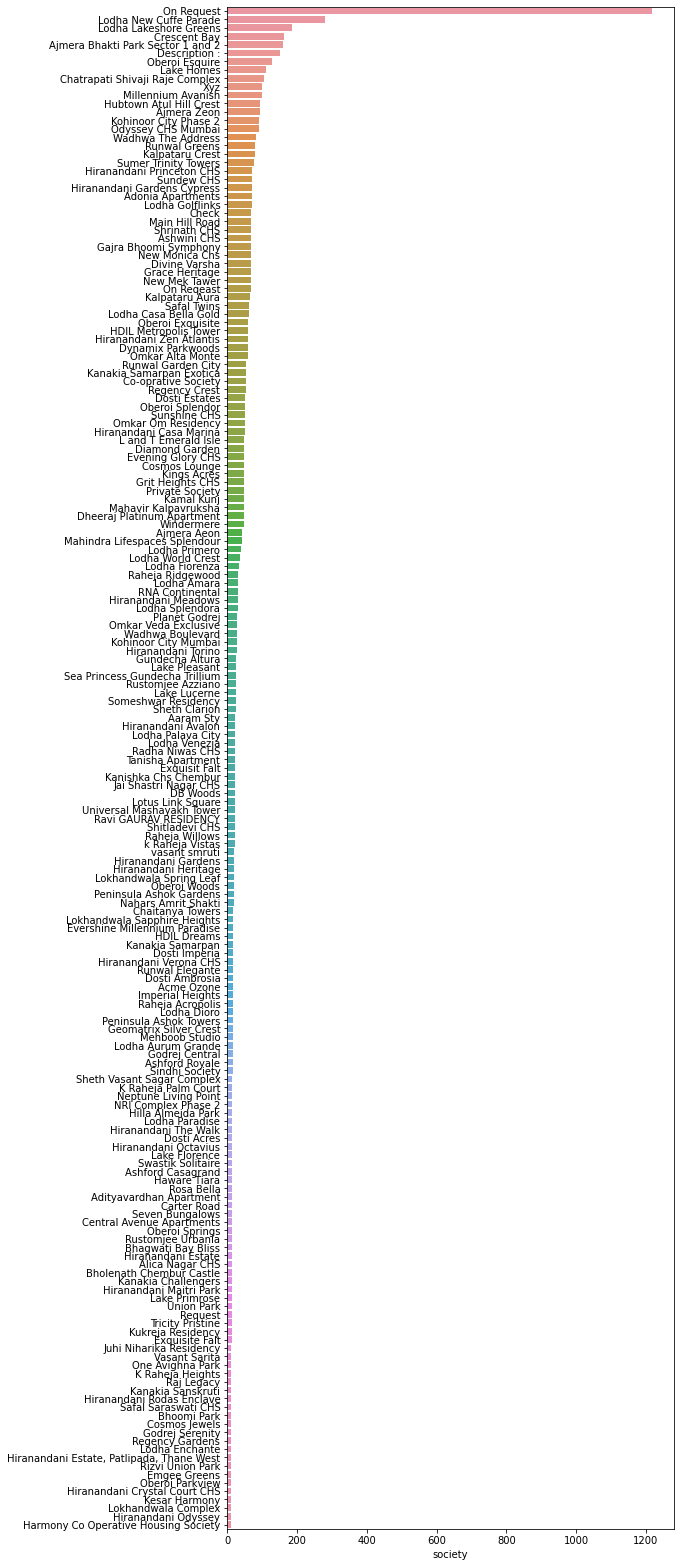

In [ ]:
sc = pd.DataFrame(df['society'].value_counts().iloc[1:,])

plt.figure(figsize=(8,28))
sns.barplot(x = 'society', y = sc.index, data=sc)
plt.show()

### type column

In [ ]:
df['type'].value_counts()

Residential Apartment      13416
Studio Apartment              69
Independent House/Villa       56
Name: type, dtype: int64

### Merging locations having count less than 10. only to simplify our model.

In [ ]:
location_count = pd.DataFrame(df['location'].value_counts())
location_count

,location
Bandra (West),571
Wadala,497
Hiranandani Gardens - Powai,463
Wadala East,458
Chembur (East),449
...,...
Sector-8 Vashi,1
Nana Pawar Chowk,1
Asavari,1
Odhav Nagar,1


In [ ]:
location_count_less_than_10_index = location_count[location_count['location']<10].index
df['location'] = df['location'].apply(lambda x: 'other location' if x in location_count_less_than_10_index else x)

In [ ]:
df['location'].value_counts()

other location                 1003
Bandra (West)                   571
Wadala                          497
Hiranandani Gardens - Powai     463
Wadala East                     458
                               ... 
Chakala                          11
4 Bunglows                       10
Sindhi Society Chembur           10
Dindoshi                         10
Sector-6 Nerul                   10
Name: location, Length: 166, dtype: int64

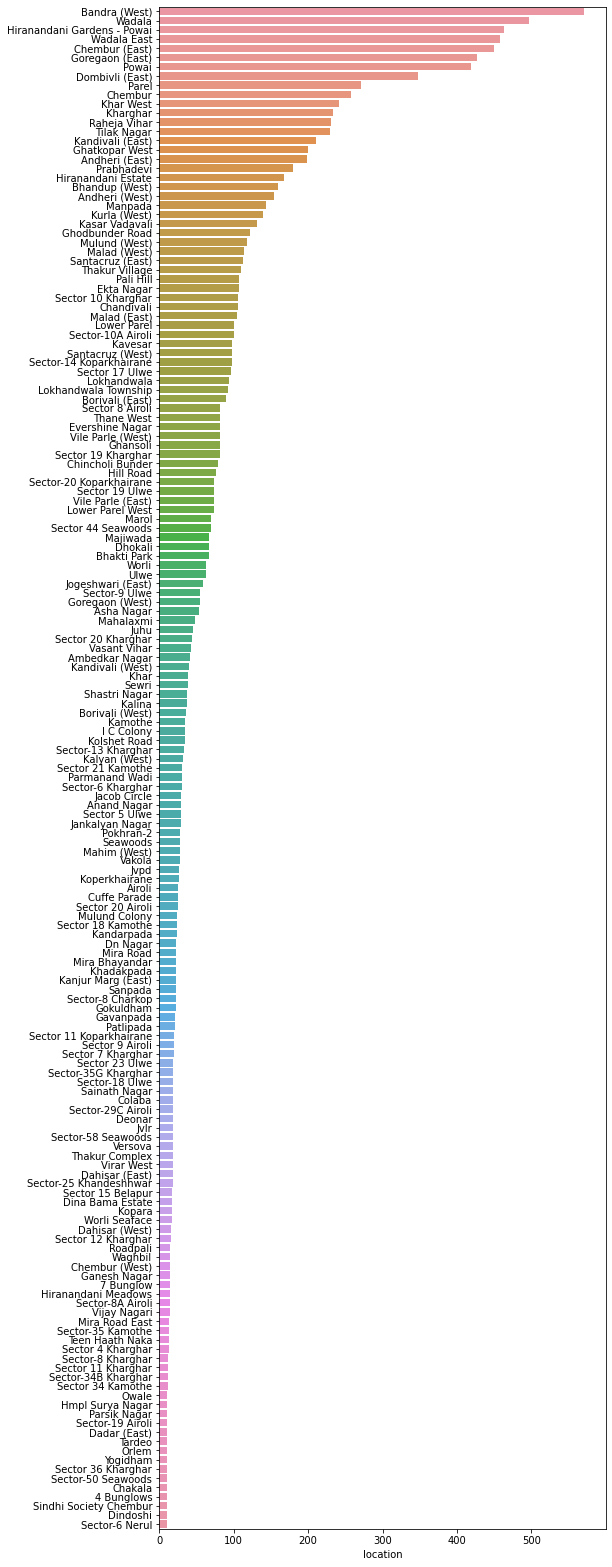

In [ ]:
location_count = pd.DataFrame(df['location'].value_counts().iloc[1:,])

plt.figure(figsize=(8,28))
sns.barplot(x = 'location', y = location_count.index, data=location_count)
plt.show()

### furnishing

In [ ]:
df.furnishing.value_counts()

Semifurnished    5661
Unfurnished      4272
Furnished        3395
Not Mentioned     213
Name: furnishing, dtype: int64

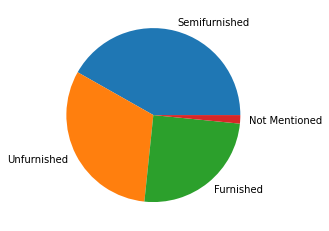

In [ ]:
plt.pie(df.furnishing.value_counts(), labels = df.furnishing.value_counts().index)
plt.show()

### Age

In [ ]:
df.age.value_counts()

1 to 5 years old     4783
5 to 10 years old    4002
0 to 1 years old     2680
10+ years old        2030
Not Mentioned          46
Name: age, dtype: int64

##Handling numerical data

### Extracting only numerals from bedrooms column.

In [ ]:
df['bedrooms'].value_counts()

2 BHK        6392
3 BHK        3447
1 BHK        2906
4 BHK         620
1 RK           69
5 BHK          46
4 Bedroom      22
1 Bedroom      12
2 Bedroom       8
3 Bedroom       7
6 BHK           5
5 Bedroom       4
7 Bedroom       2
9 Bedroom       1
Name: bedrooms, dtype: int64

In [ ]:
df['bedrooms'] = df['bedrooms'].apply(lambda x: x.strip(' ')[0])
df['bedrooms'].value_counts()

2    6400
3    3454
1    2987
4     642
5      50
6       5
7       2
9       1
Name: bedrooms, dtype: int64

### Making floor and total floors = 0 for Independent House/Villa

In [ ]:
df[df['type'] == 'Independent House/Villa']

,society,type,location,bedrooms,built-up area,furnishing,age,floor,total floors,monthly rent
1360,Union Park,Independent House/Villa,Chembur,2,935.0000,Unfurnished,1 to 5 years old,Not Mentioned,Not Mentioned,44000
1606,other society,Independent House/Villa,Lokhandwala,4,2500.0000,Semifurnished,5 to 10 years old,Not Mentioned,Not Mentioned,250000
1646,other society,Independent House/Villa,other location,4,41548.6540,Semifurnished,0 to 1 years old,Not Mentioned,Not Mentioned,310000
1788,Description :,Independent House/Villa,Juhu,4,3500.0000,Not Mentioned,5 to 10 years old,Not Mentioned,Not Mentioned,400000
1901,On Request,Independent House/Villa,Sector-8 Charkop,1,250.0000,Unfurnished,10+ years old,Not Mentioned,Not Mentioned,10500
2122,On Request,Independent House/Villa,Juhu,4,3300.0000,Furnished,5 to 10 years old,Not Mentioned,Not Mentioned,450000
2124,other society,Independent House/Villa,other location,1,269.0975,Unfurnished,0 to 1 years old,Not Mentioned,Not Mentioned,7500
2175,other society,Independent House/Villa,other location,4,3229.1700,Semifurnished,1 to 5 years old,Not Mentioned,Not Mentioned,125000
2340,other society,Independent House/Villa,Chembur,4,2500.0000,Furnished,1 to 5 years old,Not Mentioned,Not Mentioned,84000
2377,Description :,Independent House/Villa,Kharghar,2,4520.8380,Not Mentioned,10+ years old,Not Mentioned,Not Mentioned,25000


In [ ]:
type_index_list = df[df['type'] == 'Independent House/Villa'].index

for i in type_index_list:
    df['floor'][i] = 0
    df['total floors'][i] = 0

## Cleaning floor column

In [ ]:
df['floor'].unique()

array(['2nd', '8th', '14th', '40th', '4th', '3rd', '19th', '11th', '1st',
       '6th', '5th', '12th', '20th', '10th', '7th', '16th', '13th',
       'Ground', 'Not Mentioned', '24th', '34th', '25th', '9th', '33rd',
       '35th', '18th', '15th', '21st', 'ried', '40+', '36th', '17th',
       '30th', '38th', '22nd', 0, '27th', '28th', '26th', '23rd', '32nd',
       '29th', '37th', '31st', '39th'], dtype=object)

In [ ]:
df.replace({'floor': ['Ground','ried']}, 0, inplace =True)
df.replace({'floor': '40+'},41, inplace =True)
df.replace({'floor': 'Not Mentioned'}, np.NaN, inplace =True)
df = df.replace({'floor': '[A-Za-z]'}, ' ', regex = True)
df['floor'] = df['floor'].astype(str)
df['floor'] = df['floor'].apply(lambda x: x.strip())
df = df.dropna()

In [ ]:
df = df.drop(df[df['floor']=='nan'].index, axis=0)
df['floor'].unique()

array(['2', '8', '14', '40', '4', '3', '19', '11', '1', '6', '5', '12',
       '20', '10', '7', '16', '13', '0', '24', '34', '25', '9', '33',
       '35', '18', '15', '21', '41', '36', '17', '30', '38', '22', '27',
       '28', '26', '23', '32', '29', '37', '31', '39'], dtype=object)

In [ ]:
df['total floors'].unique()

array(['6', '12', '17', '41', '7', '19', '30', '23', '24', '8', '18', '4',
       '11', '14', '22', '10', '3', '39', '35', '20', '21', '40', '13',
       '15', '32', '33', '36', '16', '5', '37', '38', '27', '9', '26',
       '25', '28', 0, '34', '29', '59', '46', '31', '2', 'Not Mentioned',
       '45', '48', '42', '1', '60', '55', '52', '58'], dtype=object)

In [ ]:
(df['total floors'] == 'Not Mentioned').sum()

4

In [ ]:
df[df['total floors'] == 'Not Mentioned']

,society,type,location,bedrooms,built-up area,furnishing,age,floor,total floors,monthly rent
1946,other society,Residential Apartment,Bandra (West),2,1200.0,Furnished,0 to 1 years old,3,Not Mentioned,90000
10130,Hilla Almeida Park,Residential Apartment,Bandra (West),2,1200.0,Furnished,10+ years old,3,Not Mentioned,90000
10131,other society,Residential Apartment,Bandra (West),2,1150.0,Furnished,10+ years old,4,Not Mentioned,85000
10187,other society,Residential Apartment,Bandra (West),3,2000.0,Semifurnished,0 to 1 years old,5,Not Mentioned,120000


In [ ]:
df.replace({'total floors': 'Not Mentioned'}, np.NaN, inplace = True)
df = df.dropna()

In [ ]:
df['total floors'].unique()

array(['6', '12', '17', '41', '7', '19', '30', '23', '24', '8', '18', '4',
       '11', '14', '22', '10', '3', '39', '35', '20', '21', '40', '13',
       '15', '32', '33', '36', '16', '5', '37', '38', '27', '9', '26',
       '25', '28', 0, '34', '29', '59', '46', '31', '2', '45', '48', '42',
       '1', '60', '55', '52', '58'], dtype=object)

## EDA of numerical datatypes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13369 entries, 0 to 13539
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   society        13369 non-null  object 
 1   type           13369 non-null  object 
 2   location       13369 non-null  object 
 3   bedrooms       13369 non-null  object 
 4   built-up area  13369 non-null  float64
 5   furnishing     13369 non-null  object 
 6   age            13369 non-null  object 
 7   floor          13369 non-null  object 
 8   total floors   13369 non-null  object 
 9   monthly rent   13369 non-null  int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 1.1+ MB


In [ ]:
#At last convert all columns contains numerals into integer datatype
df['bedrooms'] = df['bedrooms'].astype(int)
df['floor'] = df['floor'].astype(int)
df['total floors'] = df['total floors'].astype(int)

In [ ]:
df.head()

,society,type,location,bedrooms,built-up area,furnishing,age,floor,total floors,monthly rent
0,other society,Residential Apartment,Bandra (West),2,800.0,Furnished,5 to 10 years old,2,6,85000
1,other society,Residential Apartment,Khar West,2,1050.0,Furnished,1 to 5 years old,8,12,110000
2,Gajra Bhoomi Symphony,Residential Apartment,Sector-20 Koparkhairane,2,1050.0,Unfurnished,1 to 5 years old,14,17,32000
3,Crescent Bay,Residential Apartment,Parel,3,2275.0,Semifurnished,1 to 5 years old,40,41,150000
4,Ashwini CHS,Residential Apartment,Tilak Nagar,1,550.0,Semifurnished,5 to 10 years old,4,7,27000


In [238]:
def plot_num(df, columns):
  data = df

  for column in columns:
      plt.figure(figsize=(16,4))

      plt.subplot(1,3,1)
      sns.histplot(data[column], kde=True)
      plt.title(f'{column}  Distribution')

      plt.subplot(1,3,2)
      sns.boxplot(y = data[column], showmeans=True)
      plt.title(f'{column}  Distribution')

      plt.subplot(1,3,3)
      counts, bins = np.histogram(data[column])
      cdf = np.cumsum (counts)
      plt.plot (bins[1:], cdf/cdf[-1])
      plt.yticks(np.arange(0,1.05,.05))
      plt.title(f'{column}  cdf')
      plt.show()

In [ ]:
int_columns = data.columns[data.dtypes!='object']
plot_num(df,int_columns)

In [ ]:
# Quantiles
for column in int_columns:
    print(f'For {column}:')

    print('3º Quartile:', df[column].quantile(q = 0.75))
    print('95 Quantile:', df[column].quantile(q = 0.95))
    print('Max:', df[column].quantile(q = 1.00),'\n')

For bedrooms:
3º Quartile: 3.0
95 Quantile: 4.0
Max: 9.0 

For built-up area:
3º Quartile: 1450.0
95 Quantile: 2400.0
Max: 41548.654 

For floor:
3º Quartile: 12.0
95 Quantile: 24.0
Max: 41.0 

For total floors:
3º Quartile: 23.0
95 Quantile: 41.0
Max: 60.0 

For monthly rent:
3º Quartile: 70000.0
95 Quantile: 180000.0
Max: 1490000.0 



In [ ]:
df['bedrooms'] = df['bedrooms'].apply(lambda x: x if x<5 else 5)
df['total floors'] = df['total floors'].apply(lambda x: x if x<41 else 41)

In [ ]:
df['built-up area'].quantile(q = 0.99)

3500.0

In [ ]:
df.drop(df[df['built-up area']>3500].index, axis=0, inplace=True)

In [ ]:
int_columns = data.columns[data.dtypes!='object']
plot_num(df, int_columns)

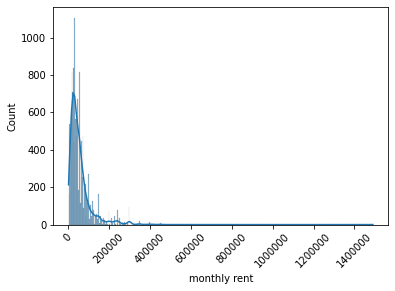

In [ ]:
sns.histplot(df['monthly rent'], kde=True)
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
plt.show()

In [ ]:
print('95th', df['monthly rent'].quantile(q = 0.95))
print('99th', df['monthly rent'].quantile(q = 0.99))

95th 160000.0
99th 300000.0


In [227]:
df.drop(df[df['monthly rent']>200000].index, axis=0, inplace=True)

KeyError: ignored

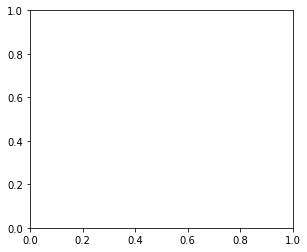

In [239]:
int_columns = data.columns[data.dtypes!='object']
plot_num(df, int_columns)

# Finally Cleaned 

<a id ='s3'></a>
# <font color = Blue> 3. Trying to look what Data all features contain are How they are `Related` with montly rent. </font>
<a href = '#top'>Back on Top </a>


In [240]:
df

,society,type,location,bedrooms,built-up area,furnishing,age,floor,total floors,monthly rent
0,other society,Residential Apartment,Bandra (West),2,800.0,Furnished,5 to 10 years old,2,6,85000
1,other society,Residential Apartment,Khar West,2,1050.0,Furnished,1 to 5 years old,8,12,110000
2,Gajra Bhoomi Symphony,Residential Apartment,Sector-20 Koparkhairane,2,1050.0,Unfurnished,1 to 5 years old,14,17,32000
3,Crescent Bay,Residential Apartment,Parel,3,2275.0,Semifurnished,1 to 5 years old,40,41,150000
4,Ashwini CHS,Residential Apartment,Tilak Nagar,1,550.0,Semifurnished,5 to 10 years old,4,7,27000
...,...,...,...,...,...,...,...,...,...,...
12792,other society,Residential Apartment,Prabhadevi,3,2529.0,Furnished,1 to 5 years old,12,32,175000
12793,Runwal Greens,Residential Apartment,Mulund (West),3,1382.0,Semifurnished,0 to 1 years old,27,40,48000
12794,other society,Residential Apartment,other location,3,1750.0,Unfurnished,10+ years old,9,16,200000
12795,other society,Residential Apartment,Sector 19 Kharghar,2,950.0,Semifurnished,5 to 10 years old,8,10,25500


In [231]:
df.to_csv('/content/drive/MyDrive/Datasets/Mumbai_house_rent_99acers/Mumbai_99acers_cleaned.csv', index=False)

In [233]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Mumbai_house_rent_99acers/Mumbai_99acers_cleaned.csv')

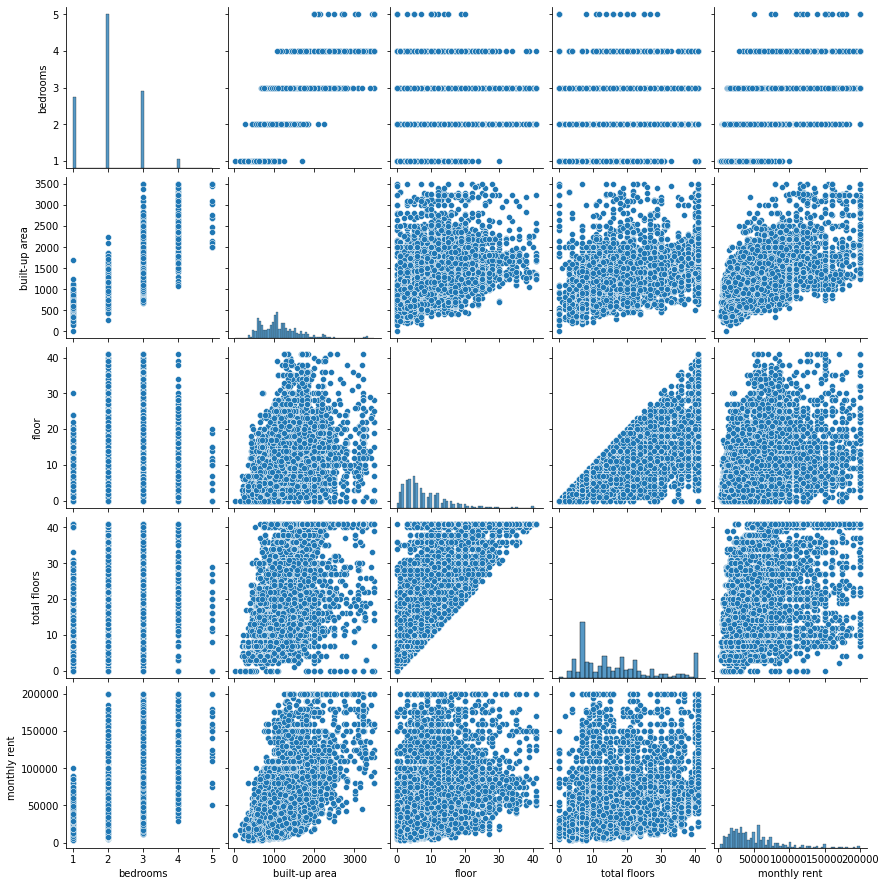

In [237]:
sns.pairplot(df)
plt.show()

<a id = 's4'></a>
# <font color = Blue> 4. OneHotEncoding Text features. </font> 
<a href = '#top'>Back on Top</a>

In [ ]:
society_dummies = pd.get_dummies(data11['society'])
society_dummies.drop('other society', axis =1, inplace = True)

In [ ]:
type_dummies = pd.get_dummies(data11['type'])
type_dummies.head()

In [ ]:
type_dummies.drop('Independent House/Villa', axis =1, inplace = True)

In [ ]:
location_dummies = pd.get_dummies(data11['location'])
location_dummies.drop('other location', axis =1, inplace = True)

In [ ]:
furnishing_dummies = pd.get_dummies(data11['furnishing'])
furnishing_dummies.head()

In [ ]:
furnishing_dummies.drop('Unfurnished', axis =1, inplace = True)

In [ ]:
age_dummies = pd.get_dummies(data11['age'])
age_dummies.head()

In [ ]:
age_dummies.drop('0 to 1 years old', axis =1, inplace = True)

In [ ]:
data11.head(3)

In [ ]:
final_data = pd.concat([data11.drop(['society','type','location','furnishing','age'], axis =1),
                        society_dummies, type_dummies, location_dummies, furnishing_dummies, age_dummies], axis = 'columns')

In [ ]:
final_data.head()

<a id = 's5'></a>
# <font color = Blue> 5. Machine Learning Model Building. </font>
<a href = '#top'>Back on Top</a>

## OneHotEncoding Text features

In [ ]:
from sklearn.preprocessing import OneHotEncoder



## Preparing Training and Testing Datasets

In [ ]:
x = final_data.drop('monthly rent', axis = 1)
y = final_data['monthly rent']

In [ ]:
x.shape

In [ ]:
y.shape

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .2, random_state = 42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

## Scaling Datasets to convert them into same range.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
scaled_x_train = scaler.transform(x_train)
scaled_x_train

In [ ]:
scaler.fit(x_test)
scaled_x_test = scaler.transform(x_test)
scaled_x_test

## Time to Built a ML model now 

## LinearRegression model with standard scaling.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
standard_scaler_linear_model = LinearRegression()
standard_scaler_linear_model.fit(scaled_x_train,y_train)

In [ ]:
standard_scaler_linear_y_pred = standard_scaler_linear_model.predict(scaled_x_test)

In [ ]:
standard_scaler_linear_model.score(scaled_x_train, y_train)

In [ ]:
standard_scaler_linear_model.score(scaled_x_test, y_test)

In [ ]:
r2_score(y_test, standard_scaler_linear_y_pred)

## Lets store it in a DataFrame. so that we can compare different model's scores in last.

In [ ]:
Final_Scores = pd.DataFrame( index = ['With Training Data', 'With Test Data'])


In [ ]:
Final_Scores['Linear Regression (Standard Scaler) %'] = [standard_scaler_linear_model.score(scaled_x_train, y_train)*100, 
                                                         standard_scaler_linear_model.score(scaled_x_test, y_test)*100]

## LinearRegression model with Normalizing scaling

In [ ]:
normalized_linear_model = LinearRegression( normalize = True)
normalized_linear_model.fit(x_train, y_train)

In [ ]:
normalized_linear_y_pred = normalized_linear_model.predict(x_test)

In [ ]:
normalized_linear_model.score(x_train, y_train)

In [ ]:
normalized_linear_model.score(x_test, y_test)

In [ ]:
r2_score(y_test, normalized_linear_y_pred)

In [ ]:
Final_Scores['Linear Regression (Normalization Scaler) %'] = [normalized_linear_model.score(x_train, y_train)*100, 
                                                              normalized_linear_model.score(x_test, y_test)*100]

##  Decision Tree Regressor model

In [ ]:
from sklearn.tree import DecisionTreeRegressor
ssdtr_model = DecisionTreeRegressor()
ssdtr_model.fit( scaled_x_train, y_train)

In [ ]:
ssdtr_y_pred = ssdtr_model.predict(scaled_x_test)

In [ ]:
ssdtr_model.score(scaled_x_train, y_train)

In [ ]:
ssdtr_model.score(scaled_x_test, y_test)

In [ ]:
r2_score(y_test, ssdtr_y_pred)

In [ ]:
Final_Scores['Decision Tree Regressor %'] = [ssdtr_model.score(scaled_x_train, y_train)*100,
                                             ssdtr_model.score(scaled_x_test, y_test)*100]

## Random Forest Regressor model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
ssrfr_model = RandomForestRegressor()
ssrfr_model.fit(scaled_x_train, y_train)

In [ ]:
ssrfr_y_pred = ssrfr_model.predict(scaled_x_test)

In [ ]:
ssrfr_model.score(scaled_x_train, y_train)

In [ ]:
ssrfr_model.score(scaled_x_test, y_test)

In [ ]:
r2_score(y_test, ssrfr_y_pred)

In [ ]:
Final_Scores['Random Forest Regressor %'] = [ssrfr_model.score(scaled_x_train, y_train)*100,
                                             ssrfr_model.score(scaled_x_test, y_test)*100]

<a id = 's6'></a>
# <font color = Red> Finally Lets Compare Scores now </font>

In [ ]:
Final_Scores

# <font color = Green> We Deploy Random Forest Regressor model to predict Monthly Rent with highest accuracy.</font>

## Created by: Gaurav 
<a href = '#top'>Back on Top</a>

<a href = 'https://github.com/G0rav'> Github Link</a>